#Color Spaces and Reading Images in OpenCV

https://realpython.com/python-opencv-color-spaces/

In [ ]:
import cv2

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [ ]:
len(flags)

274

In [ ]:
flags[40]

'COLOR_BGR2HLS'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

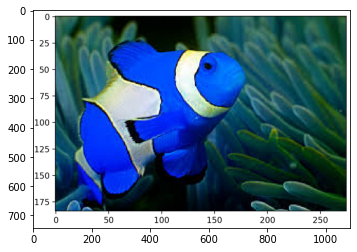

In [ ]:
nemo = cv2.imread('nemo2.png')
plt.imshow(nemo)
plt.show()

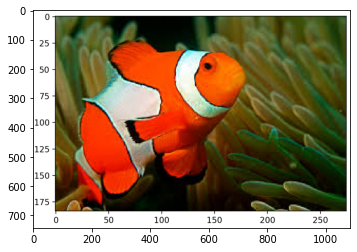

In [ ]:
nemo = cv2.cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

#Visualizing Nemo in HSV Color Space

In [ ]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [ ]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [ ]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [ ]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

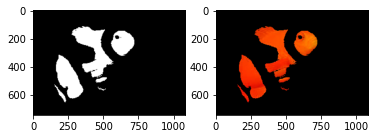

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

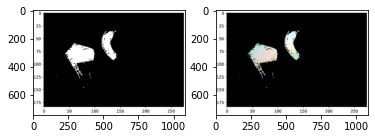

In [ ]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

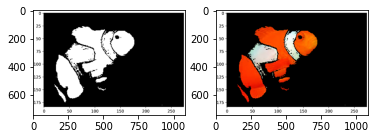

In [ ]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask = final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

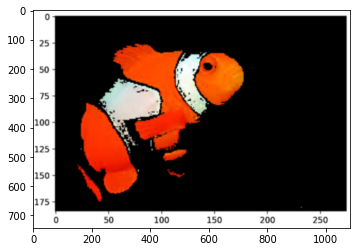

In [ ]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Nemo/

/content/drive/MyDrive/Nemo


In [ ]:
path = "/content/drive/MyDrive/Nemo/"

In [ ]:
nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread("nemo" + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

In [ ]:
def segment_fish(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

In [ ]:
results = [segment_fish(friend) for friend in nemos_friends]

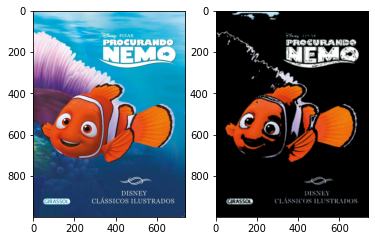

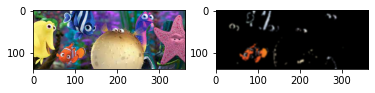

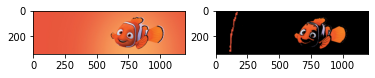

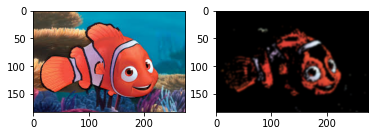

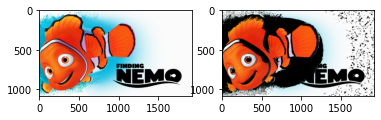

In [ ]:
for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

In [ ]:
from matplotlib.colors import hsv_to_rgb

In [ ]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

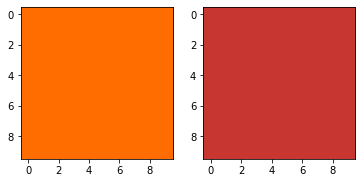

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()